In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from patsy import dmatrices


In [6]:
df_data = pd.read_csv("SLID.csv")


In [7]:
df_data

,wages,education,age,gender,language
0,10.56,15.0,40,Male,English
1,11.00,13.2,19,Male,English
2,NaN,16.0,49,Male,Other
3,17.76,14.0,46,Male,Other
4,NaN,8.0,71,Male,English
...,...,...,...,...,...
7420,NaN,8.0,73,Male,Other
7421,30.49,16.0,52,Male,Other
7422,22.00,15.0,41,Male,Other
7423,11.85,11.0,47,Female,English


/Users/alsodaniel/data_science/data_science/env_3.11.5/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


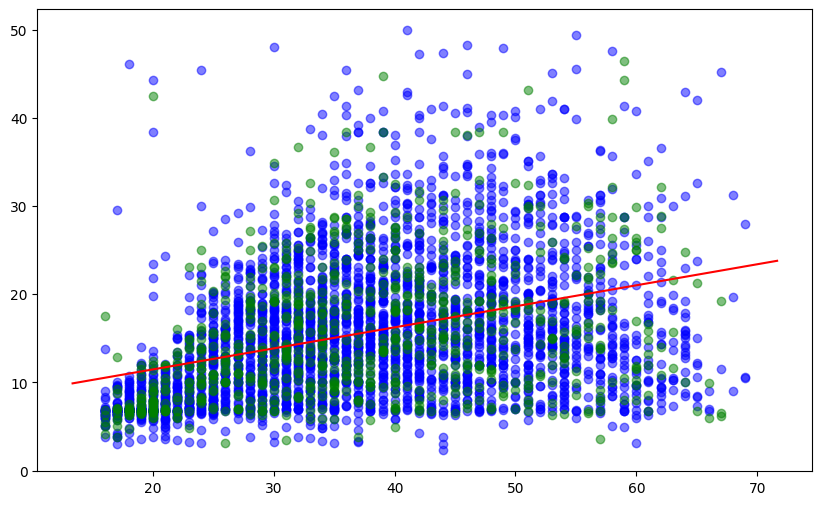

In [18]:
y, X = dmatrices('wages ~ education + age + gender + language', data=df_data, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2
#r2 is very low so it tells us our data is too scattered


plt.figure(figsize=(10, 6))
plt.scatter(X_train['age'], y_train, label='Training data', color='blue', alpha=0.5)
plt.scatter(X_test['age'], y_test, label='Testing data', color='green', alpha=0.5)


model_wage_age = LinearRegression()
model_wage_age.fit(X_train[['age']], y_train)

x_min, x_max = plt.xlim()
x_range = np.linspace(x_min, x_max, 100)
y_range = model_wage_age.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, label="Linear regression (age vs wages)", color="red")
